## EXERCISE 1

Create the following causal network to verify that the red path is indeed a backdor path using the Causal Graphical Models library

<img src='https://drive.google.com/uc?id=18HUhYGI9Bd2eR87jW_1AdQyCZZBOtBfD'>

## SOLUTION

We create a network object with four nodes and four edges, oriented as in the above graph:

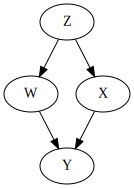

In [ ]:
!pip install causalgraphicalmodels
!sed -i 's/collections/collections.abc/g' /usr/local/lib/python3.10/dist-packages/causalgraphicalmodels/cgm.py
import causalgraphicalmodels as cgm

bdnet1 = cgm.CausalGraphicalModel(
    nodes = ['X', 'Y', 'Z', 'W'],
    edges = [
        ('X','Y'),
        ('Z', 'X'),
        ('Z', 'W'),
        ('W', 'Y')
    ]
)

bdnet1.draw()

To list all the possible backdoor paths between  X  and  Y , we can use the following method:

In [ ]:
bdnet1.get_all_backdoor_paths('X', 'Y')

[['X', 'Z', 'W', 'Y']]

and the answer indeed corresponds to the red path in the original figure.

## EXERCISE 2

Create the following causal network using the Causal Graphical Models library and find out all the possible sets that satisfy the backdoor criterion.

<img src='https://drive.google.com/uc?id=1rY42DmXV7TpRm7rt5N7m78w30VmyvotC'>

## SOLUTION

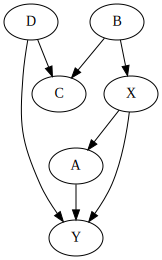

In [ ]:
bdnet2 = cgm.CausalGraphicalModel(
    nodes = ['X', 'Y', 'A', 'B', 'C', 'D'],
    edges = [
        ('X','A'), ('A', 'Y'),
        ('X', 'Y'),
        ('B', 'X'), ('B', 'C'), ('D', 'C'), ('D', 'Y')
    ]
)

bdnet2.draw()

This network has one backdoor path:

In [ ]:
bdnet2.get_all_backdoor_paths('X', 'Y')

[['X', 'B', 'C', 'D', 'Y']]

We can now ask what are the valid sets satisfying the backdoor criterion:

In [ ]:
bdnet2.get_all_backdoor_adjustment_sets('X', 'Y')

frozenset({frozenset(),
           frozenset({'D'}),
           frozenset({'B'}),
           frozenset({'B', 'D'}),
           frozenset({'B', 'C'}),
           frozenset({'C', 'D'}),
           frozenset({'B', 'C', 'D'})})

We can also check whether a given set (e.g.,  {B,C,D}) is valid by using the following method:

In [ ]:
bdnet2.is_valid_backdoor_adjustment_set('X', 'Y', {'B', 'C', 'D'})

True

and again we confirmed that $\{B, C, D\}$ is a valid set for backdoor adjustment.

## EXERCISE 3

Create the following causal network using the Causal Graphical Models library and find out all the valid sets for applying the front-door criterion.

<img src='https://drive.google.com/uc?id=1Z6YiKMDVKPLFM5luY_pT78ovSpWH-Ibd'>

## SOLUTION

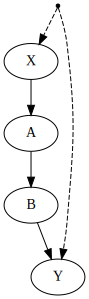

In [ ]:
bdnet3 = cgm.CausalGraphicalModel(
    nodes = ['X', 'A', 'B', 'Y'],
    edges = [
        ('X','A'),
        ('A', 'B'),
        ('B', 'Y'),
    ],
    latent_edges = [
    ('X', 'Y')
    ]

)

bdnet3.draw()

The following method can be used to detect all the valid sets for applying the front-door criterion:

In [ ]:
bdnet3.get_all_frontdoor_adjustment_sets('X', 'Y')

frozenset({frozenset({'B'}), frozenset({'A'}), frozenset({'A', 'B'})})

## EXERCISE 4

Create the following causal network using the Causal Graphical Models library and find out all the valid sets for applying the front-door criterion.

<img src='https://drive.google.com/uc?id=1lK3HZktVYCsJrDzZYEB0uQhL-DxWACcP'>

## SOLUTION

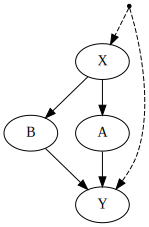

In [ ]:
bdnet3 = cgm.CausalGraphicalModel(
    nodes = ['X', 'Y', 'A', 'B'],
    edges = [
        ('X','A'),
        ('A', 'Y'),
        ('X', 'B'),
        ('B', 'Y'),
    ],
    latent_edges = [
    ('X', 'Y')
    ]

)

bdnet3.draw()

The following method can be used to detect all the valid sets for applying the front-door criterion:

In [ ]:
bdnet3.get_all_frontdoor_adjustment_sets('X', 'Y')

frozenset({frozenset({'A', 'B'})})

## EXERCISE 5

Consider again the smoking example, for which we have the following data from an hypothetical experiment with 400 smokers and 400 non-smokers:

<img src='https://drive.google.com/uc?id=1RvqtRMF4auVECmSniLFm5yOCq3ykmT-0'>

Write a Python program implementing the front-door adjustment and compute the causal effect of smoking on lung cancer is $P(y | do(x))$.



# SOLUTION

The program should implement the front-door adjustment formula, which was already given in the lecture:

$
\begin{align*}
P(y | do(x)) &= \sum_z P(z|x) \sum_{x'} P(y|z,x') P(x') \\
&= P(z|x) \left[ P(y|z,x)P(x) + P(y|z,\neg x)P(\neg x) \right] + P(\neg z|x) \left[ P(y|\neg z,x)P(x) + P(y|\neg z,\neg x)P(\neg x) \right]
\end{align*}
$

All the probabilities can be extracted from the smoking experiment data (which indeed represents the jont distribution ${\bf P}(X, Y, Z)$), so the equation above becomes

$
\begin{align*}
P(y | do(x)) &= (380/400) \times [(57/380) \times (400/800) + (19/20) \times (400/800)] + (20/400) \times [(2/20) \times (400/800) + (342/380) \times (400/800)] \\
&= 0.5475
\end{align*}
$

## Further comments about the given data

The table with the data, from which the above probabilities can be extracted, is from Pearl et al.'s book _Causal Inference in Statistics -- A Primer_ (sec. 3.4).

<img src='https://drive.google.com/uc?id=1RvqtRMF4auVECmSniLFm5yOCq3ykmT-0'>

The book provides some more explanations about the origin of this _hyphotetical_ experiment. The following considerations might also help to understand why the above data is counterintuitive (on purpose), but very possible.

Consider this potential explanation: in some countries, there are many more young smokers than old ones. Old people are probably more likely to develop cancer than young people. Therefore the data shows many more smokers without cancer (because they are younger) than non-smokers (because older).

Age, in this case, is a confounder of smoking X and cancer Y, but unfortunately is unobserved, therefore we cannot control for it. By observing the tar deposit, though, we can still find the causal effect of smoking on cancer.

If we didn't have the tar information, the only way to overcome unobserved confounders would be to run a randomised controlled trial (RCT), where we randomly choose people and split them in two groups, forcing one group to smoke and the other one not, and then waiting to see who develops cancer. Obviously such experiment is impossible!

In [ ]:
t,f =0,1
import numpy as np
#Prob. Distributions
P_X = np.array([400/800, 400/800])
P_Z_X = np.array([[380/400, 20/400],[20/400, 380/400]])
P_Y_ZX = np.array([[[57/380, 19/20],[2/20, 342/380]],[[323/380, 1/20],[18/20, 38/380]]])


p1 =  P_Y_ZX[t,t,f] * P_X[f] + P_Y_ZX[t,t,t] * P_X[t]

p2 = P_Y_ZX[t,f,f] * P_X[f] + P_Y_ZX[t,f,t] * P_X[t]

p_y_dox= P_Z_X[t,t] * p1 + P_Z_X[f,t] * p2 # P(y|do(x))

print(p_y_dox)

0.5475
